Epoch 0, Loss: 0.48931147245945844
Epoch 1000, Loss: 0.018812917669475272
Epoch 2000, Loss: 0.013902886546173415
Epoch 3000, Loss: 0.012749365871141442
Epoch 4000, Loss: 0.012263711619577653
Epoch 5000, Loss: 0.012004933871979758
Epoch 6000, Loss: 0.011847255299831154
Epoch 7000, Loss: 0.011742246188869002
Epoch 8000, Loss: 0.011667452991169001
Epoch 9000, Loss: 0.011611028918179157
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



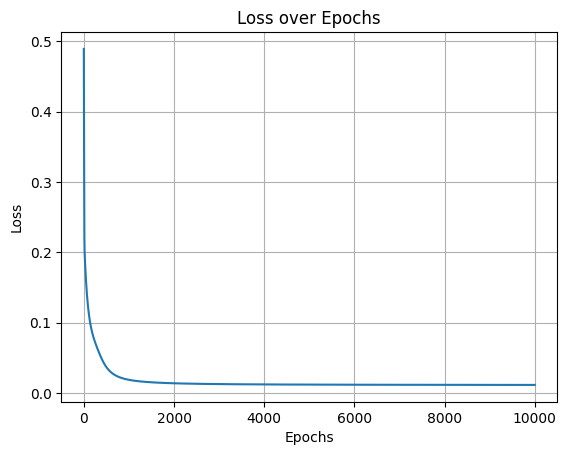

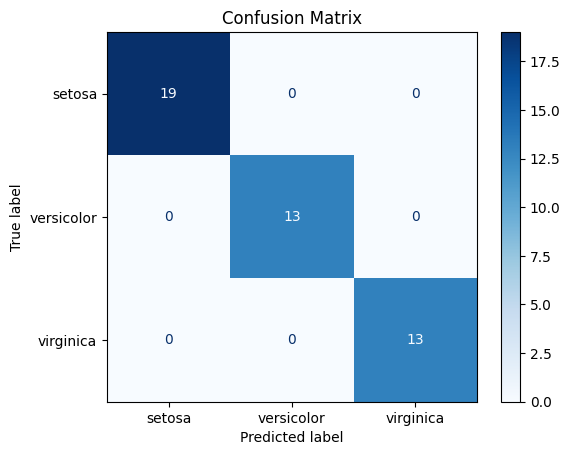

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_hidden = np.random.rand(self.hidden_size)
        self.bias_output = np.random.rand(self.output_size)
        self.losses = []

    def forward(self, X):
        # Forward pass
        self.hidden_layer_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_activation)
        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_activation)
        return self.output

    def backward(self, X, y, learning_rate):
        # Backward pass
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - self.output))
            self.losses.append(loss)
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Load dataset and preprocess
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding of the target variable
y = np.eye(3)[y]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 5  # Number of neurons in the hidden layer
output_size = y_train.shape[1]

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs=10000, learning_rate=0.01)

# Test the neural network
y_pred = nn.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and print the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=iris.target_names)
print('Classification Report:')
print(report)

# Plot loss over epochs
plt.plot(nn.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
